#Data Cleaning

In [1]:
%pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-08-07 16:24:40--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  32.1MB/s    in 0.7s    

2025-08-07 16:24:41 (32.1 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1=pd.read_excel("Online Retail.xlsx")
print(df1.shape)
df1.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
empty_counts = df1.isna().sum()
print(empty_counts)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
219133,556085,82600,NO SINGING METAL SIGN,1,2011-06-08 15:23:00,4.13,NaN,United Kingdom
67189,541827,22792,FLUTED ANTIQUE CANDLE HOLDER,2,2011-01-21 17:05:00,1.63,NaN,United Kingdom
511197,579472,23293,SET OF 12 FAIRY CAKE BAKING CASES,1,2011-11-29 15:09:00,0.83,13521.0,United Kingdom
387752,570380,21749,LARGE RED RETROSPOT WINDMILL,1,2011-10-10 12:35:00,2.10,14606.0,United Kingdom
178743,552234,22423,REGENCY CAKESTAND 3 TIER,1,2011-05-06 16:01:00,24.96,NaN,United Kingdom
454507,575583,22422,TOOTHPASTE TUBE PEN,1,2011-11-10 11:55:00,0.65,14456.0,United Kingdom
37084,539453,20735,BLACK MINI TAPE MEASURE,1,2010-12-17 17:08:00,0.85,NaN,United Kingdom
42157,539958,22791,T-LIGHT GLASS FLUTED ANTIQUE,1,2010-12-23 13:26:00,2.51,NaN,United Kingdom
251281,559052,22413,METAL SIGN TAKE IT OR LEAVE IT,2,2011-07-05 16:53:00,5.79,NaN,United Kingdom
538515,581407,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,1,2011-12-08 13:59:00,0.29,13263.0,United Kingdom


In [8]:
df1["CustomerID"] = df1["CustomerID"].fillna("Unknown")
df1.sample(10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
def to_int(idx):
  try:
    return int(idx)
  except:
    return idx

In [10]:
df1["CustomerID"]=df1["CustomerID"].apply(lambda idx: to_int(idx))
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31765,539010,47599A,PINK PARTY BAGS,1,2010-12-15 13:24:00,2.10,15005,United Kingdom
392042,570688,22680,FRENCH BLUE METAL DOOR SIGN 5,2,2011-10-11 16:29:00,2.46,Unknown,United Kingdom
533077,581006,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,12,2011-12-07 08:45:00,2.95,14911,EIRE
418431,572721,21484,CHICK GREY HOT WATER BOTTLE,4,2011-10-25 15:07:00,4.25,16201,United Kingdom
229505,557058,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-06-16 14:47:00,4.95,16843,United Kingdom
366309,568721,22090,PAPER BUNTING RETROSPOT,4,2011-09-28 16:24:00,5.79,Unknown,United Kingdom
306186,563739,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-08-18 20:05:00,0.42,17750,United Kingdom
490772,578065,22728,ALARM CLOCK BAKELIKE PINK,3,2011-11-22 15:41:00,7.46,Unknown,United Kingdom
129795,547396,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,2,2011-03-22 16:54:00,2.46,Unknown,United Kingdom
468312,576447,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-11-15 11:30:00,1.65,13949,United Kingdom


In [11]:
import numpy as np

def desc(idx):
  try:
    return idx.mode().iloc[0]
  except:
    return np.nan

In [12]:
desc_map=df1.groupby("StockCode")["Description"].agg(lambda idx: desc(idx))

In [13]:
df1["Correct Description"]=df1["StockCode"].map(desc_map)
df1.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Correct Description
406814,571831,21810,CHRISTMAS HANGING STAR WITH BELL,48,2011-10-19 12:01:00,0.39,16979,United Kingdom,CHRISTMAS HANGING STAR WITH BELL
437737,574298,35967,FOLK ART METAL STAR T-LIGHT HOLDER,1,2011-11-03 15:56:00,0.83,Unknown,United Kingdom,FOLK ART METAL STAR T-LIGHT HOLDER
253450,559163,21580,RABBIT DESIGN COTTON TOTE BAG,1,2011-07-06 16:33:00,1.63,Unknown,United Kingdom,RABBIT DESIGN COTTON TOTE BAG
336776,566400,23329,DECORATIVE WICKER HEART LARGE,12,2011-09-12 13:16:00,1.65,17139,United Kingdom,DECORATIVE WICKER HEART LARGE
344759,567097,21485,RETROSPOT HEART HOT WATER BOTTLE,6,2011-09-16 13:23:00,4.95,13323,United Kingdom,RETROSPOT HEART HOT WATER BOTTLE
30988,538886,21205,MULTICOLOUR 3D BALLS GARLAND,6,2010-12-14 16:07:00,2.55,13846,United Kingdom,MULTICOLOUR 3D BALLS GARLAND
304789,563613,84279P,CHERRY BLOSSOM DECORATIVE FLASK,8,2011-08-18 08:49:00,3.75,12688,Israel,CHERRY BLOSSOM DECORATIVE FLASK
421512,572994,23332,IVORY WICKER HEART LARGE,12,2011-10-27 11:10:00,1.65,17684,United Kingdom,IVORY WICKER HEART LARGE
167787,551005,20711,JUMBO BAG TOYS,2,2011-04-26 09:48:00,4.13,Unknown,United Kingdom,JUMBO BAG TOYS
23705,538209,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,2,2010-12-10 11:42:00,4.25,12748,United Kingdom,CHOCOLATE 3 WICK MORRIS BOX CANDLE


In [14]:
df1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Correct Description,112


In [15]:
df1["Description"]=df1["Correct Description"]

In [16]:
df1.drop(columns=["Correct Description"], inplace=True)

In [17]:
df1.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
126691,547094,22722,SET OF 6 SPICE TINS PANTRY DESIGN,4,2011-03-21 08:39:00,3.95,13934,United Kingdom
242939,558383,22469,HEART OF WICKER SMALL,24,2011-06-29 08:58:00,1.65,18075,United Kingdom
343296,566949,21671,RED SPOT CERAMIC DRAWER KNOB,2,2011-09-15 16:32:00,3.29,Unknown,United Kingdom
364697,568670,85150,LADIES & GENTLEMEN METAL SIGN,2,2011-09-28 13:07:00,2.55,14978,United Kingdom
71609,C542150,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,-1,2011-01-26 10:30:00,2.55,14049,United Kingdom
134872,547871,22556,PLASTERS IN TIN CIRCUS PARADE,6,2011-03-27 14:28:00,1.65,16931,United Kingdom
5519,536864,21874,GIN AND TONIC MUG,1,2010-12-03 11:27:00,3.36,Unknown,United Kingdom
84534,543399,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,1,2011-02-08 11:07:00,5.79,Unknown,United Kingdom
388179,570420,21224,SET/4 SKULL BADGES,1,2011-10-10 13:33:00,1.25,17841,United Kingdom
517854,580095,22835,HOT WATER BOTTLE I AM SO POORLY,12,2011-12-01 14:54:00,4.95,14135,United Kingdom


In [18]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [19]:
df1[df1["Quantity"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [20]:
df1[df1["UnitPrice"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,Unknown,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,Unknown,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,Unknown,United Kingdom


In [21]:
df2=df1[(df1["Quantity"]>0) & (df1["UnitPrice"]>0)].copy()
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
263828,560036,85194S,HANGING SPRING FLOWER EGG SMALL,48,2011-07-14 13:51:00,0.19,14911,EIRE
53128,540821,21906,PHARMACIE FIRST AID TIN,1,2011-01-11 13:16:00,13.57,Unknown,United Kingdom
307814,563928,21933,PINK VINTAGE PAISLEY PICNIC BAG,1,2011-08-21 15:17:00,1.65,17059,United Kingdom
212538,555492,22549,PICTURE DOMINOES,24,2011-06-03 14:24:00,1.45,16967,United Kingdom
26628,538518,22359,GLASS JAR KINGS CHOICE,1,2010-12-12 16:14:00,2.95,14505,United Kingdom
294040,562680,23345,DOLLY GIRL BEAKER,1,2011-08-08 13:46:00,1.25,17954,United Kingdom
176190,551997,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,1,2011-05-05 15:47:00,1.63,Unknown,United Kingdom
532805,580997,85179A,GREEN BITTY LIGHT CHAIN,4,2011-12-06 17:23:00,1.25,15023,United Kingdom
205317,554792,21080,SET/20 RED RETROSPOT PAPER NAPKINS,24,2011-05-26 12:38:00,0.85,12547,Spain
371964,569229,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1,2011-10-02 14:56:00,4.95,14502,United Kingdom


In [22]:
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [23]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice
count,530104.000000,530104,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625
min,1.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000
50%,3.000000,2011-07-20 12:58:00,2.080000
75%,10.000000,2011-10-19 12:39:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,155.524124,NaN,35.915681


#Sales Analysis

In [24]:
df2["TotalSales"]=df2["UnitPrice"]*df2["Quantity"]
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
260830,559816,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,6,2011-07-12 16:11:00,1.38,Unknown,United Kingdom,8.28
33348,539250,22108,PING! MICROWAVE PLATE,8,2010-12-16 13:44:00,1.25,15157,United Kingdom,10.00
366914,568800,22141,CHRISTMAS CRAFT TREE TOP ANGEL,12,2011-09-29 10:45:00,2.10,14868,United Kingdom,25.20
111729,545821,22118,JOY WOODEN BLOCK LETTERS,3,2011-03-07 12:50:00,4.95,13001,United Kingdom,14.85
192873,553487,20974,12 PENCILS SMALL TUBE SKULL,4,2011-05-17 12:38:00,0.65,13246,United Kingdom,2.60
436246,574093,22197,POPCORN HOLDER,12,2011-11-03 09:43:00,0.85,12437,France,10.20
27782,538566,22813,PACK 3 BOXES BIRD PANNETONE,2,2010-12-13 11:21:00,4.21,Unknown,United Kingdom,8.42
206001,554858,22668,PINK BABY BUNTING,5,2011-05-27 10:15:00,2.95,17042,United Kingdom,14.75
418329,572704,22738,RIBBON REEL SNOWY VILLAGE,1,2011-10-25 14:39:00,4.13,Unknown,United Kingdom,4.13
126073,547063,22855,FINE WICKER HEART,12,2011-03-20 13:33:00,1.25,14769,United Kingdom,15.00


In [25]:
df2["Month"]=df2["InvoiceDate"].dt.month
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
9004,537160,22086,PAPER CHAIN KIT 50'S CHRISTMAS,3,2010-12-05 13:18:00,2.95,14161,United Kingdom,8.85,12
41010,539750,22737,RIBBON REEL CHRISTMAS PRESENT,3,2010-12-21 15:40:00,2.51,Unknown,United Kingdom,7.53,12
367268,568878,21181,PLEASE ONE PERSON METAL SIGN,12,2011-09-29 12:34:00,2.10,14524,United Kingdom,25.20,9
102236,545000,21527,RED RETROSPOT TRADITIONAL TEAPOT,4,2011-02-25 12:37:00,7.95,15281,United Kingdom,31.80,2
435430,574074,90018B,GOLD M.O.P ORBIT DROP EARRINGS,1,2011-11-02 15:33:00,4.15,Unknown,United Kingdom,4.15,11
354415,567878,20983,12 PENCILS TALL TUBE RED RETROSPOT,2,2011-09-22 14:42:00,0.85,16910,United Kingdom,1.70,9
384062,570102,22568,FELTCRAFT CUSHION OWL,8,2011-10-07 12:17:00,3.75,16455,United Kingdom,30.00,10
121782,546784,48194,DOORMAT HEARTS,2,2011-03-17 09:49:00,7.95,18189,United Kingdom,15.90,3
453688,575491,21844,RED RETROSPOT MUG,6,2011-11-09 17:47:00,2.95,15531,United Kingdom,17.70,11
479708,577174,23265,SET OF 3 WOODEN TREE DECORATIONS,1,2011-11-18 10:58:00,1.25,17841,United Kingdom,1.25,11


In [26]:
monthly_sales =df2.groupby("Month")["TotalSales"].sum()
monthly_sales

,TotalSales
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


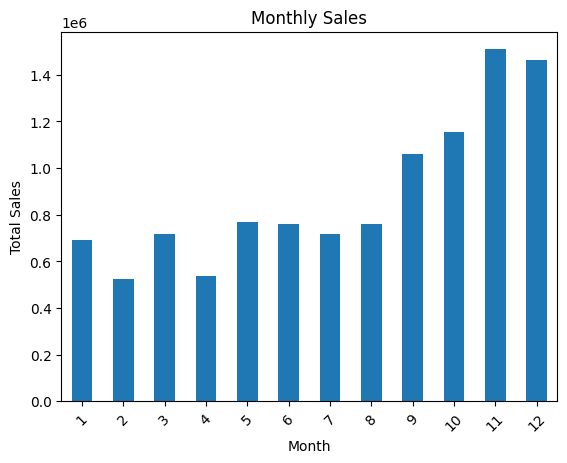

In [27]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind="bar")
# monthly_sales.plot()
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [28]:
country_sales=df2.groupby("Country")["TotalSales"].sum()
country_sales.sort_values(ascending=False, inplace=True)
country_sales

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


Country
United Kingdom    89.958016
Netherlands        2.845158
EIRE               2.825300
Germany            2.281211
France             2.090315
Name: TotalSales, dtype: float64


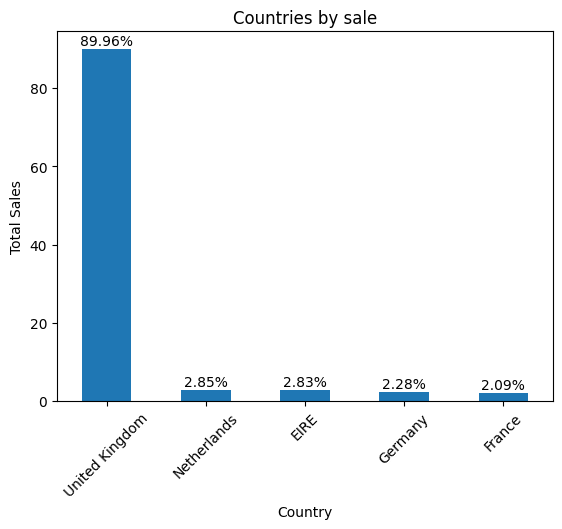

In [29]:
country_sales_top5=country_sales.head()
country_sales_percent=((country_sales_top5)/(country_sales_top5).sum())*100
print(country_sales_percent)
country_sales_percent.plot(kind="bar")

for i in range(len(country_sales_percent)):
  val=country_sales_percent.iloc[i]
  plt.text(i, val+1, f"{val:.2f}%",ha="center")


plt.title("Countries by sale")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

In [49]:
product_sales=df2.groupby("StockCode")[["Description","TotalSales"]].sum()
product_sales.sort_values(by="TotalSales",ascending=False,inplace=True)
print(df2[["Description", "TotalSales"]].dtypes)
product_sales.head()

Description     object
TotalSales     float64
dtype: object


,Description,TotalSales
StockCode,,
DOT,DOTCOM POSTAGEDOTCOM POSTAGEDOTCOM POSTAGEDOTC...,206248.77
22423,REGENCY CAKESTAND 3 TIERREGENCY CAKESTAND 3 TI...,174484.74
23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
85123A,WHITE HANGING HEART T-LIGHT HOLDERWHITE HANGIN...,104518.80
47566,PARTY BUNTINGPARTY BUNTINGPARTY BUNTINGPARTY B...,99504.33


In [58]:
product_sales_percent=product_sales.copy()
product_sales_percent["TotalSales"]=((product_sales["TotalSales"])/(product_sales["TotalSales"].sum())*100).round(3)
product_sales_percent.rename(columns={
    "TotalSales":"TotalSalesPercent"
},inplace=True)
product_sales_percent.head()

,Description,TotalSalesPercent
StockCode,,
DOT,DOTCOM POSTAGEDOTCOM POSTAGEDOTCOM POSTAGEDOTC...,1.934
22423,REGENCY CAKESTAND 3 TIERREGENCY CAKESTAND 3 TI...,1.636
23843,"PAPER CRAFT , LITTLE BIRDIE",1.579
85123A,WHITE HANGING HEART T-LIGHT HOLDERWHITE HANGIN...,0.980
47566,PARTY BUNTINGPARTY BUNTINGPARTY BUNTINGPARTY B...,0.933
